In [14]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from os import system
import graphviz
from pyramid.arima import auto_arima

In [15]:
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [16]:
input_data1 = pd.read_csv("C:/Users/arjun/Downloads/Crimes_2001_to_present.csv", index_col='Date')

In [17]:
input_data1.index = pd.to_datetime(input_data1.index)

In [20]:
input_data1['mon'] = input_data1.index.month

In [21]:
input_data1.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,mon
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 19:44:00,10000092,HY189866,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,...,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)",3
2015-03-18 23:00:00,10000094,HY190059,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,...,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)",3
2015-03-18 22:45:00,10000095,HY190052,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,...,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)",3
2015-03-18 22:30:00,10000096,HY190054,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,225,...,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)",3
2015-03-18 21:00:00,10000097,HY189976,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,1113,...,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)",3


In [22]:
def get_season(row):
    if row >= 3 and  row <= 5:
        return '1'
    elif row >= 6 and  row <= 8:
        return '2'
    elif row >= 9 and row <= 11:
        return '3'
    else:
        return '4'

In [23]:
input_data1['Season'] = input_data1['mon'].apply(get_season)

In [24]:
input_data1.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,mon,Season
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 19:44:00,10000092,HY189866,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,...,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)",3,1
2015-03-18 23:00:00,10000094,HY190059,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,...,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)",3,1
2015-03-18 22:45:00,10000095,HY190052,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,...,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)",3,1
2015-03-18 22:30:00,10000096,HY190054,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,225,...,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)",3,1
2015-03-18 21:00:00,10000097,HY189976,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,1113,...,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)",3,1


In [25]:
df1 = input_data1[['Primary Type', 'Season']]

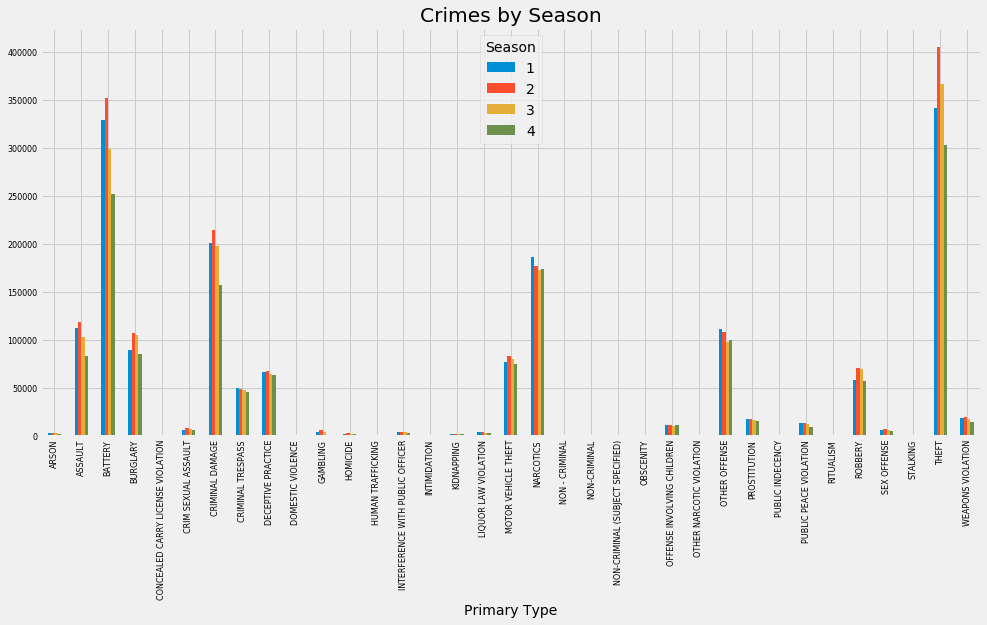

In [50]:
df1.groupby(['Primary Type','Season']).size().unstack().plot.bar(title='Crimes by Season',figsize=(15,7),fontsize=8)
plt.show()